In [1]:
import pandas as pd
import numpy as np
import statsmodels as stm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df['car_age'] = 2023 - df['model_year']
df['car_age'].head()

0    20
1    16
2     5
3    14
4    14
Name: car_age, dtype: int64

In [5]:
df2 = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'car_age', 'fuel_efficiency_mpg']]

In [6]:
df2

,engine_displacement,horsepower,vehicle_weight,car_age,fuel_efficiency_mpg
0,170,159.0,3413.433759,20,13.231729
1,130,97.0,3149.664934,16,13.688217
2,170,78.0,3079.038997,5,14.246341
3,220,NaN,2542.392402,14,16.912736
4,210,140.0,3460.870990,14,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,10,15.101802
9700,180,154.0,2439.525729,19,17.962326
9701,220,138.0,2583.471318,15,17.186587
9702,230,177.0,2905.527390,12,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

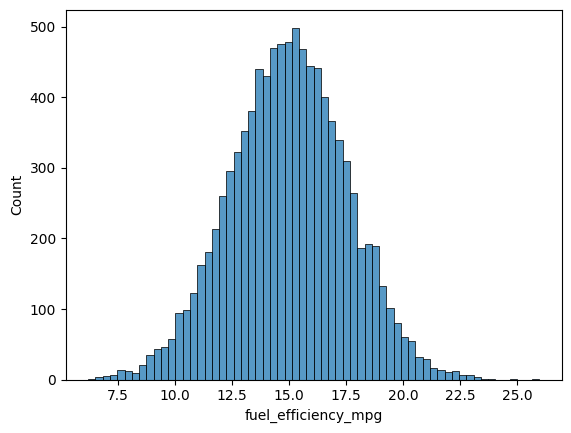

In [7]:
sns.histplot(df2['fuel_efficiency_mpg'])

In [8]:
df2.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
car_age                  0
fuel_efficiency_mpg      0
dtype: int64

In [9]:
df2['horsepower'].median()

np.float64(149.0)

In [10]:
n = len(df2)
n_val = int(n * 0.2)
n_test = int (n * 0.2)
n_train =n - n_val - n_test

idx = np.arange(n)

np.random.seed(2)
np.random.shuffle(idx)
df_train = df2.iloc[idx[:n_train]]
df_val = df2.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [11]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,car_age,fuel_efficiency_mpg
246,170,164.0,2990.040917,4,15.963019
8125,170,NaN,2729.623741,11,15.931964
1927,200,142.0,3126.513375,4,14.284901
8235,200,148.0,3136.477901,20,14.865210
424,230,141.0,3384.681613,17,12.428822


In [12]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']
X_train = df_train[['engine_displacement', 'horsepower', 'vehicle_weight', 'car_age']]
X_val = df_val[['engine_displacement', 'horsepower', 'vehicle_weight', 'car_age']]
X_test = df_test[['engine_displacement', 'horsepower', 'vehicle_weight', 'car_age']]

X_train['horsepower'] = X_train['horsepower'].fillna(X_train['horsepower'].mean())

/var/folders/8v/4x_0t_bn79bdzpkrj55x4kr00000gn/T/ipykernel_90689/1095712559.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['horsepower'] = X_train['horsepower'].fillna(X_train['horsepower'].mean())


In [13]:
X_train

,engine_displacement,horsepower,vehicle_weight,car_age
246,170,164.000000,2990.040917,4
8125,170,149.573277,2729.623741,11
1927,200,142.000000,3126.513375,4
8235,200,148.000000,3136.477901,20
424,230,141.000000,3384.681613,17
...,...,...,...,...
5313,210,145.000000,3054.841280,2
4484,210,142.000000,2440.034914,2
7107,260,169.000000,2701.627103,21
9043,240,137.000000,2383.896460,7


In [14]:
model1 = LinearRegression()
model1 = model1.fit(X_train, y_train)

In [15]:
model1.coef_

array([ 0.00020173,  0.01045072, -0.0050125 , -0.00129226])

In [16]:
model1.intercept_

np.float64(28.447196725278353)

In [20]:
X_val['horsepower'] = X_val['horsepower'].fillna(X_train['horsepower'].mean())

y_pred = model1.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))
rmse

/var/folders/8v/4x_0t_bn79bdzpkrj55x4kr00000gn/T/ipykernel_90689/1373299048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['horsepower'] = X_val['horsepower'].fillna(X_train['horsepower'].mean())


np.float64(0.4697379225129181)

In [22]:
all_rsme = []
for a in range(0, 10):

    n = len(df2)
    n_val = int(n * 0.2)
    n_test = int (n * 0.2)
    n_train =n - n_val - n_test
    idx = np.arange(n)
    np.random.seed(a)
    np.random.shuffle(idx)
    df_train = df2.iloc[idx[:n_train]]
    df_val = df2.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    y_train = df_train['fuel_efficiency_mpg']
    y_val = df_val['fuel_efficiency_mpg']
    y_test = df_test['fuel_efficiency_mpg']
    X_train = df_train[['engine_displacement', 'horsepower', 'vehicle_weight', 'car_age']]
    X_val = df_val[['engine_displacement', 'horsepower', 'vehicle_weight', 'car_age']]
    X_test = df_test[['engine_displacement', 'horsepower', 'vehicle_weight', 'car_age']]
    X_train['horsepower'] = X_train['horsepower'].fillna(X_train['horsepower'].mean())
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    
    X_val['horsepower'] = X_val['horsepower'].fillna(X_train['horsepower'].mean())
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    all_rsme.append(rmse)

all_rsme

/var/folders/8v/4x_0t_bn79bdzpkrj55x4kr00000gn/T/ipykernel_90689/874672285.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['horsepower'] = X_train['horsepower'].fillna(X_train['horsepower'].mean())
/var/folders/8v/4x_0t_bn79bdzpkrj55x4kr00000gn/T/ipykernel_90689/874672285.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['horsepower'] = X_val['horsepower'].fillna(X_train['horsepower'].mean())
/var/folders/8v/4x_0t_bn79bdzpkrj55x4kr00000gn/T/ipykernel_90689/874672285.py:21: SettingWithC

[np.float64(0.4610419516435258),
 np.float64(0.47036887630353025),
 np.float64(0.4697379225129181),
 np.float64(0.46342680172481293),
 np.float64(0.4574538002809307),
 np.float64(0.4748641678974783),
 np.float64(0.46673756061003796),
 np.float64(0.45787440822676717),
 np.float64(0.4617886825700226),
 np.float64(0.4554219291508995)]

In [24]:
round(np.std(all_rsme), 3)

np.float64(0.006)